# Difference in Difference Deaths

In [1]:
import pandas as pd
import numpy as np
Deaths = pd.read_csv('deaths-pop-merge.csv')
Deaths['Mortality_rate_per100000']=Deaths['death_prop']*100000

## For Florida

In [2]:
states=['Washington','Texas'] 
Floridadf=Deaths[~Deaths.State.isin(states)] # removing Washington and texas and keeping: Florida vs the rest of the country 
pre_FL=Floridadf[(Floridadf.State=='Florida')&(Floridadf.Year<2010)] # filtering for pre policy years for Florida 
post_FL=Floridadf[(Floridadf.State=='Florida')&(Floridadf.Year>=2010)] #post policy years for Florida
pre_contr=Floridadf[(Floridadf.Treatment=='Control')&(Floridadf.Year<2010)] # pre policy years for all the other control states 
post_contr=Floridadf[(Floridadf.Treatment=='Control')&(Floridadf.Year>=2010)] #post policy years for all the other control states


In [3]:
from plotnine import *
def diffIndiff(prepolicy_contr,postpolicy_contr,prepolicy_treatment,postpolicy_treatment,xvar,yvar,policyyear):
    m=(
    ggplot()
    # plot all chosen states,  pre policy year
    + geom_smooth(
        prepolicy_contr,
        aes(x=xvar, y=yvar,color="Treatment"),
        method="lm",
    )
    # plot all chosen states, post policy year
    + geom_smooth(
        postpolicy_contr,
        aes(x=xvar, y=yvar,color="Treatment"),
        method="lm",
    )
    # plot treatment, pre policy year
    + geom_smooth(
        prepolicy_treatment,
        aes(x=xvar, y=yvar, color="Treatment"),
        method="lm",
    )
    # plot treatment, post policy year
    + geom_smooth(
        postpolicy_treatment,
        aes(x=xvar, y=yvar, color="Treatment"),
        method="lm",
    )
    + geom_vline(xintercept=policyyear, linetype="dotted")
    + xlab("Year")
    + ylab("Mortality rate per 100,000 people")
    + theme_classic(base_family="Times")
    + scale_x_continuous(breaks=[2003,2004,2005,2006, 2007,2008, 2009,2010,2011 ,2012,2013,2014], limits=[2003, 2014])
    )
    return m


In [4]:
def pre_post(prepolicy_treatment, postpolicy_treatment, xvar, yvar, policyyear):
    m = (
        ggplot()
        # plot treatment, pre policy year
        + geom_smooth(
            prepolicy_treatment,
            aes(x=xvar, y=yvar, color="State"),
            method="lm",
        )
        # plot treatment, post policy year
        + geom_smooth(
            postpolicy_treatment,
            aes(x=xvar, y=yvar, color="State"),
            method="lm",
        )
        + geom_vline(xintercept=policyyear, linetype="dotted")
        + xlab("Year")
        + ylab("Mortality rate per 100,000 people")
        + theme_classic(base_family="Times")
        + scale_x_continuous(
            breaks=[
                2003,
                2004,
                2005,
                2006,
                2007,
                2008,
                2009,
                2010,
                2011,
                2012,
                2013,
                2014,
            ],
            limits=[2003, 2014],
        )
    )
    return m


/Users/marlynehakizimana/opt/miniconda3/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/marlynehakizimana/opt/miniconda3/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: Pre-Post-Mortality-rate-FL.png


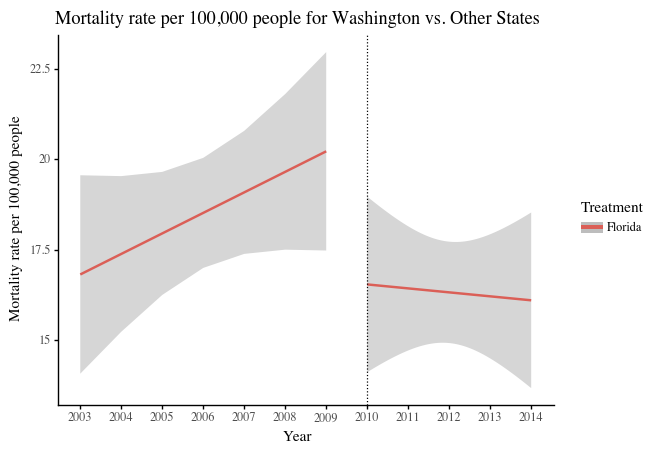

<ggplot: (307691201)>

In [5]:
m=pre_post(pre_FL,post_FL,'Year','Mortality_rate_per100000',2010)+ labs(title="Mortality rate per 100,000 people for Washington vs. Other States", color="Treatment")
#ggsave(plot=m,filename='Pre-Post-Mortality-rate-FL.png')
m

/Users/marlynehakizimana/opt/miniconda3/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/marlynehakizimana/opt/miniconda3/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: Diff-Diff-Mortality-rate-FL.png


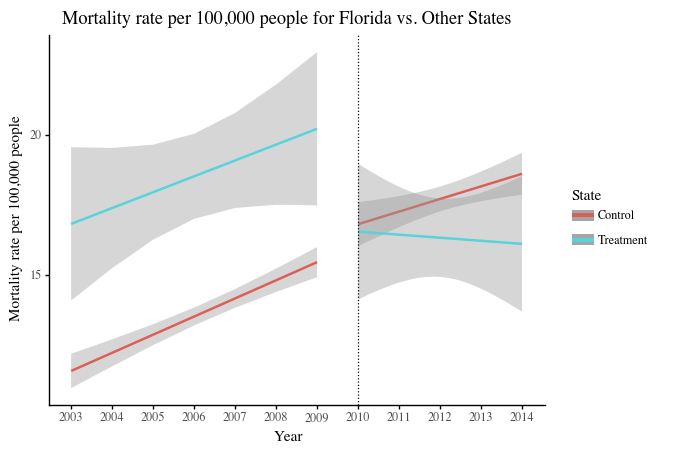

<ggplot: (308079851)>

In [6]:
m=diffIndiff(pre_contr,post_contr,pre_FL,post_FL,'Year','Mortality_rate_per100000',2010)+ labs(title="Mortality rate per 100,000 people for Florida vs. Other States ", color="State")
#ggsave(plot=m,filename='Diff-Diff-Mortality-rate-FL.png')
m

# Washington

In [7]:
states=['Florida','Texas']
Wadf=Deaths[~Deaths.State.isin(states)] # removing Florida and texas and keeping Washington vs the rest of the country 
pre_Wa=Wadf[(Wadf.State=='Washington')&(Wadf.Year<2012)]
post_Wa=Wadf[(Wadf.State=='Washington')&(Wadf.Year>=2012)]
pre_contr=Wadf[(Wadf.Treatment=='Control')&(Wadf.Year<2012)]
post_contr=Wadf[(Wadf.Treatment=='Control')&(Wadf.Year>=2012)]


/Users/marlynehakizimana/opt/miniconda3/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/marlynehakizimana/opt/miniconda3/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: Pre-Post-Mortality-rate-Wa.png


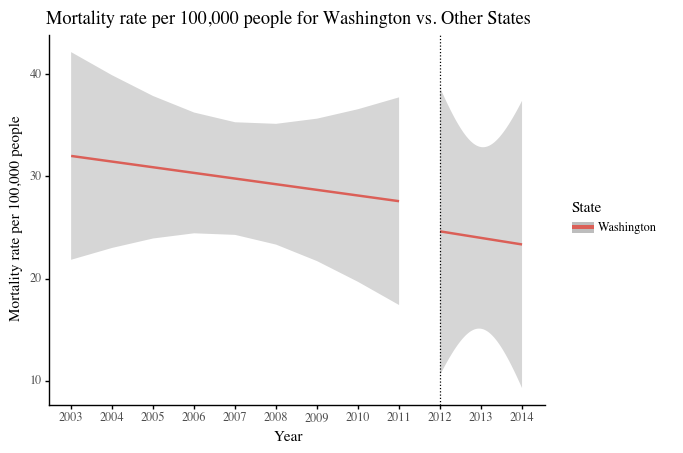

<ggplot: (307735173)>

In [8]:
m=pre_post(pre_Wa,post_Wa,'Year','Mortality_rate_per100000',2012)+ labs(title="Mortality rate per 100,000 people for Washington vs. Other States", color="State")
#ggsave(plot=m,filename='Pre-Post-Mortality-rate-Wa.png')
m

/Users/marlynehakizimana/opt/miniconda3/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/marlynehakizimana/opt/miniconda3/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: Diff-Diff-Mortality-rate-Wa.png


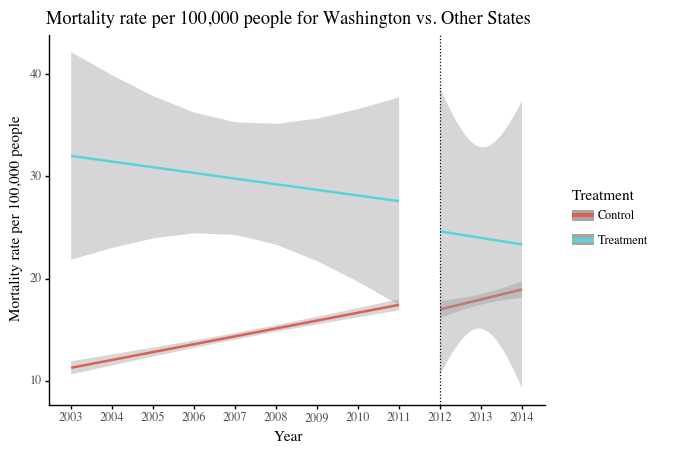

<ggplot: (301239465)>

In [9]:
m=diffIndiff(pre_contr,post_contr,pre_Wa,post_Wa,'Year','Mortality_rate_per100000',2012)+ labs(title="Mortality rate per 100,000 people for Washington vs. Other States", color="Treatment")
#ggsave(plot=m,filename='Diff-Diff-Mortality-rate-Wa.png')
m

## Texas

In [10]:
states=['Florida','Washington']
Txdf=Deaths[~Deaths.State.isin(states)] # removing Florida and Washington and keeping Washington vs the rest of the country 
pre_Tx=Txdf[(Txdf.State=='Texas')&(Txdf.Year<2007)]
post_Tx=Txdf[(Txdf.State=='Texas')&(Txdf.Year>=2007)]
pre_contr=Txdf[(Txdf.Treatment=='Control')&(Txdf.Year<2007)]
post_contr=Txdf[(Txdf.Treatment=='Control')&(Txdf.Year>=2007)]


/Users/marlynehakizimana/opt/miniconda3/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/marlynehakizimana/opt/miniconda3/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: Pre-Post-Mortality-rate-Tx.png


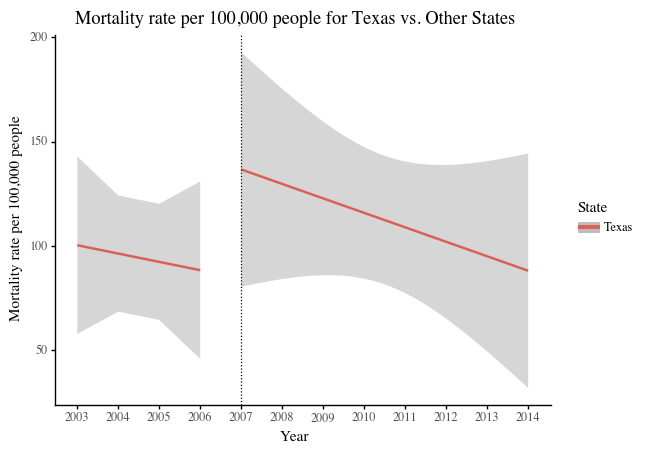

<ggplot: (300673034)>

In [11]:
m=pre_post(pre_Tx,post_Tx,'Year','Mortality_rate_per100000',2007)+ labs(title="Mortality rate per 100,000 people for Texas vs. Other States", color="State")
#ggsave(plot=m,filename='Pre-Post-Mortality-rate-Tx.png')
m

/Users/marlynehakizimana/opt/miniconda3/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/marlynehakizimana/opt/miniconda3/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: Diff-Diff-Mortality-rate-Tx.png


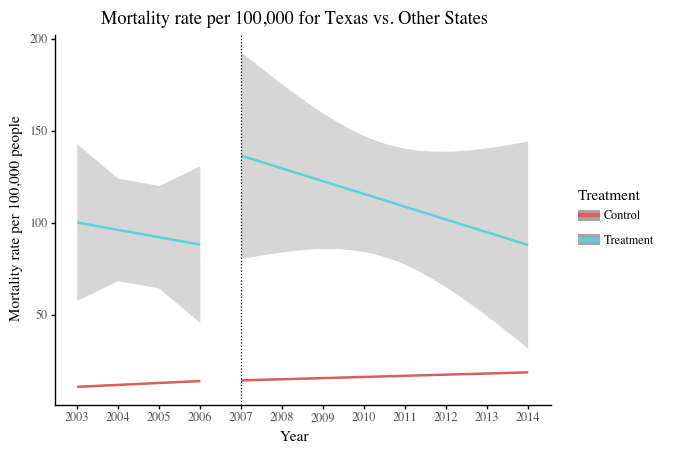

<ggplot: (308999789)>

In [12]:
m=diffIndiff(pre_contr,post_contr,pre_Tx,post_Tx,'Year','Mortality_rate_per100000',2007)+ labs(title="Mortality rate per 100,000 for Texas vs. Other States", color="Treatment")
#ggsave(plot=m,filename='Diff-Diff-Mortality-rate-Tx.png') #saves it as a png 
m